# Using Machine Learning to explain and predict the life expectancy of different countries

The project tries to create a model based on data provided by the World Health Organization (WHO) to evaluate the life
expectancy for different countries in years. The data offers a timeframe from 2000 to 2015. The data originates from here:
https://www.kaggle.com/kumarajarshi/life-expectancy-who/data
The output algorithms have been used to test if they can maintain their accuracy in predicting the life expectancy for data they haven't been trained. 
<ol>
    <li>Linear Regression</li>
    <li>Ridge Regression</li>
    <li>Lasso Regression</li>
    <li>ElasticNet Regression</li>
     
</ol>

In [1]:
%matplotlib inline

In [ ]:
pip install nose

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##from nose.tools import *
from sklearn  import *
from scipy import stats
import seaborn as sns

### Part 1. Loading packages

The following packages have been imported NymPy, Pandas, Matplotlib, Scipy, Seaborn. Sklearn is the most widely used package for the machine learning process. The fallowing subpackages have been used:
<ol>
    <li>train_test_split</li>
    <li>linear_model</li>
    <li>model_selection</li>
    <li>metrics</li>
    <li>tree</li>
    <li>ensemble</li>
    <li>preprocessing</li>
</ol>

In [4]:
life_data = pd.read_csv(r'C:\Users\alok mishra\Desktop\tcs interview\llSPS-INT-1916-Predicting-Life-Expectancy-using-Machine-Learning-master\Life Expectancy Data.csv', sep = ',')
life_data = life_data.drop('Year', axis = 1)

### Part 2. Reading the data

The data is saved as a csv file as LifeExpectancy.csv and it is read and stored in the life_data variable.The Year column is dropped as it will not be used in the analysis. Below the first 5 rows are shown. The data contains 21 columns and 2938 rows with the header row. The table contains data about:
<ol>
    <li>Country</li>
    <li>Status</li>
    <li>Life Expectancy</li>
    <li>Adult Mortality</li>
    <li>Alcohol</li>
    <li>percentage expenditure</li>
    <li>Hepatitis B</li>
    <li>Measles</li>
    <li>BMI</li>
    <li>under-five deaths</li>
    <li>Polio </li>
    <li>Total expenditure</li>
    <li>Diphtheria</li>
    <li>HIV/AIDS</li>
    <li>GDP</li>
    <li>Population</li>
    <li>thinness  1-19 years</li>
    <li>thinness 5-9 years</li>
    <li>Income composition of resources</li>
    <li>Schooling</l>
</ol>                    
With the exclution of Country name and Status(either developed or developing) all of the data is numeric. The values are either in years, precentages, millions or dollars in the case of Gross Domestic Product (GDP)

In [5]:
life_data.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
status = pd.get_dummies(life_data.Status)
life_data = pd.concat([life_data, status], axis = 1)
life_data = life_data.drop(['Status'], axis=1)
life_data.rename(columns = {'Deloping' : '0', 'Developed' : 1})

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,1,Developing
0,Afghanistan,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,Zimbabwe,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,Zimbabwe,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,Zimbabwe,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


In [10]:
life_data = life_data.groupby('Country').mean()
life_data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0,1


In [11]:
life_data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

Text(0, 0.5, 'Life expectancy')

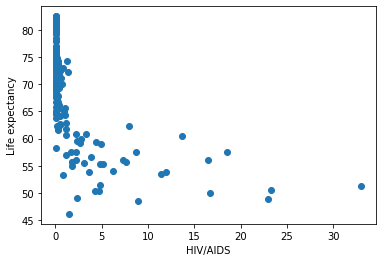

In [12]:
plt.scatter(life_data[' HIV/AIDS'], life_data['Life expectancy '])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

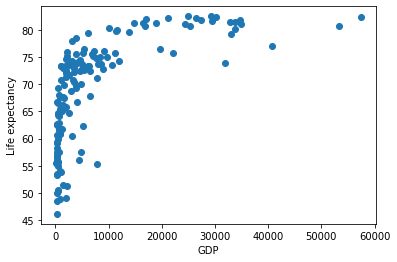

In [13]:
plt.scatter(life_data.GDP, life_data['Life expectancy '])
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

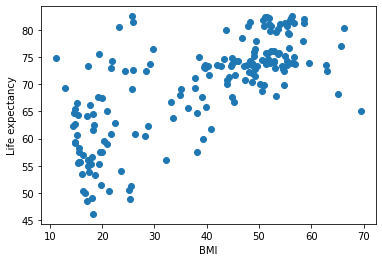

In [14]:
plt.scatter(life_data[' BMI '], life_data['Life expectancy '])
plt.xlabel('BMI')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

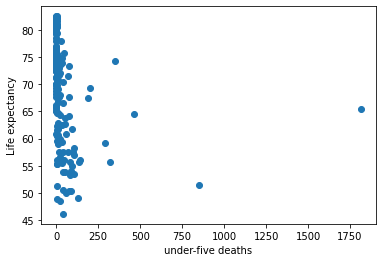

In [15]:
plt.scatter(life_data['under-five deaths '], life_data['Life expectancy '])
plt.xlabel('under-five deaths')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

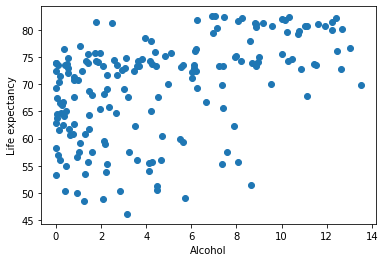

In [16]:
plt.scatter(life_data['Alcohol'], life_data['Life expectancy '])
plt.xlabel('Alcohol')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

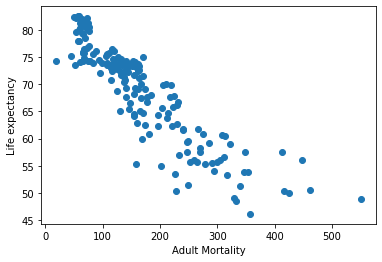

In [17]:
plt.scatter(life_data['Adult Mortality'], life_data['Life expectancy '])
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

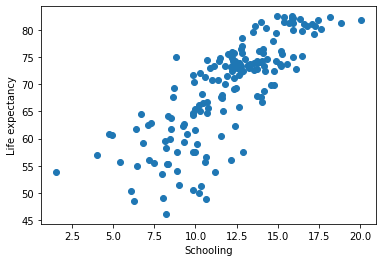

In [18]:
plt.scatter(life_data['Schooling'], life_data['Life expectancy '])
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

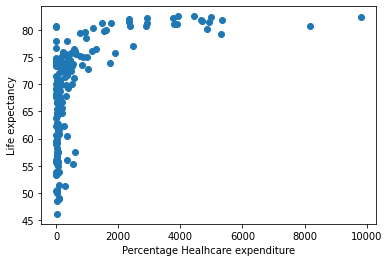

In [19]:
plt.scatter(life_data['percentage expenditure'], life_data['Life expectancy '])
plt.xlabel('Percentage Healhcare expenditure')
plt.ylabel('Life expectancy')

Using the scatter plot we plot the Life Expectancy against some other variables to see if there is any correlation between them.
<br>
There seem to be a positive correlation between The Percentage of Healthcare Expenditure, Schooling, GDP and BMI and Life Expectancy, while there is a negative one between Adult Mortality, AIDS and Life Expectancy,there does not seem to have any correlation between Alcohol, under 5 years - old deaths and Life Expectancy.

<AxesSubplot:>

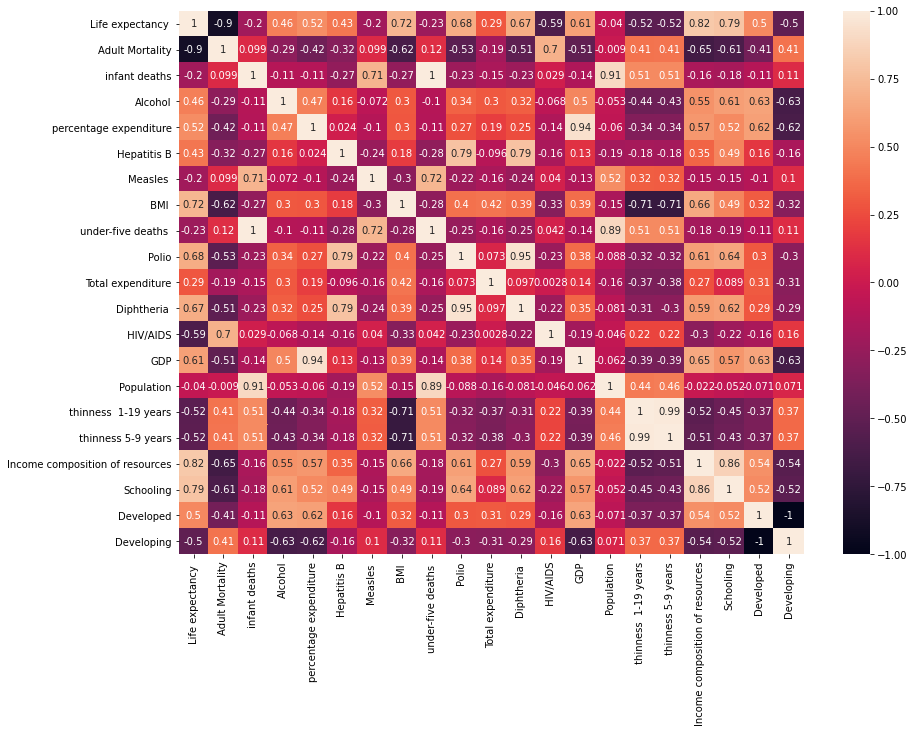

In [20]:
plt.figure(figsize = (14, 10))
sns.heatmap(life_data.corr(), annot = True)


Now we will plot the correlation matrix visulizing it with a heatmap. The legend tells that the warmer colors show higher and positive correlation, while the colder low or negative.
<br>
There is a very high correlation between thinness of 5-9 year-old and that of 1-19 year-old. Also between population and infant deaths, under 5 deaths, another is between schooling and income composition of resources. On the other hand Life expectancy and Adult Mortality are very highly negatively correlated.

### Part 4. Preprocessing the data

The raw data is not suitable for us to start building a model so some preprocessing will be done. First the Status of the country is turned into numberical with the get_dummies function, so we get 2 new columns. The original column is being dropped. Second the data is being grouped by the country and we find the mean values during the 2000 - 2015 year period.
<br>
Then the Life expectancy column is removed to form the life_labels variable or the output, and the rest is stored as the life_features variable. Now we consider that we have some null values in the table, the isnull function has been used to find the with the boolean True. Below that the number of null values are displayed in each separate column. It is mostly situated in the Population and GDP columns. 
<br>
Now the missing values are filled with the mean of its respective column. This will create some distortions, but the other option in removing parts of the table will shrink the data so it will be avoided here because the number of rows is not that high. The final shape for the life_features is 193 rows to 20 columns.
Finally considering the large differences in the values of the columns, there will be some scaling with the MinMaxScaler function.
<br>
Now we will split the data into a training part of 70% and a testing of 30%. Cross validation will be initialized with the creation of 5 fold split.

In [21]:
life_labels = life_data['Life expectancy ']
life_features = life_data.drop('Life expectancy ', axis = 1)

In [22]:
life_features.isnull().head() 

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Albania,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Algeria,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Angola,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Antigua and Barbuda,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [30]:
life_features.isnull().sum()

Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
Developed                           0
Developing                          0
dtype: int64

In [31]:
life_labels.isnull().sum()

10

In [32]:
life_features.fillna(value = life_features.mean(), inplace = True)

In [33]:
life_labels.fillna(value = life_labels.mean(), inplace = True)

In [34]:
stats.describe(life_features[1:])

DescribeResult(nobs=192, minmax=(array([1.87500000e+01, 0.00000000e+00, 1.00000000e-02, 0.00000000e+00,
       8.00000000e+00, 0.00000000e+00, 5.20000000e+00, 0.00000000e+00,
       9.00000000e+00, 1.64666667e+00, 9.00000000e+00, 1.00000000e-01,
       1.36183210e+02, 2.92000000e+02, 1.00000000e-01, 1.00000000e-01,
       1.31687500e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([5.50062500e+02, 1.36668750e+03, 1.34973333e+01, 9.80181038e+03,
       9.90000000e+01, 6.58579375e+04, 8.73000000e+01, 1.81250000e+03,
       9.90000000e+01, 1.72400000e+01, 9.90000000e+01, 3.29437500e+01,
       5.73628746e+04, 4.21467691e+08, 2.71000000e+01, 2.79437500e+01,
       9.31437500e-01, 2.00375000e+01, 1.00000000e+00, 1.00000000e+00])), mean=array([1.64253396e+02, 2.85745443e+01, 4.46296480e+00, 7.12321318e+02,
       7.85909681e+01, 2.30174674e+03, 3.96797168e+01, 3.96419271e+01,
       8.26078218e+01, 6.01668050e+00, 8.23842541e+01, 1.67047526e+00,
       7.25930328e+03, 1.25835883e

In [36]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
life_features = min_max_scaler.fit_transform(life_features)

In [37]:
life_features

array([[4.71121045e-01, 5.72552248e-02, 3.24378429e-04, ...,
        4.09856519e-01, 0.00000000e+00, 1.00000000e+00],
       [4.95235855e-02, 5.03041112e-04, 3.58762543e-01, ...,
        6.05739239e-01, 0.00000000e+00, 1.00000000e+00],
       [1.68333137e-01, 1.48625783e-02, 2.94103109e-02, ...,
        6.34435434e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.63369015e-01, 2.88105364e-02, 2.76802926e-03, ...,
        4.24516532e-01, 0.00000000e+00, 1.00000000e+00],
       [6.31572756e-01, 2.44660905e-02, 1.65290890e-01, ...,
        5.59575795e-01, 0.00000000e+00, 1.00000000e+00],
       [8.34960593e-01, 1.94356793e-02, 3.31570362e-01, ...,
        4.90330630e-01, 0.00000000e+00, 1.00000000e+00]])

In [40]:
from sklearn.model_selection import *
life_features_train, life_features_test, life_labels_train, life_labels_test = train_test_split(
        life_features, life_labels, train_size = 0.7, test_size = 0.3)

### Part 5 Linear Regression and additions

In [42]:
from sklearn.linear_model import *
linear_model = LinearRegression()
linear_model.fit(life_features_train, life_labels_train)

LinearRegression()

In [43]:
print('R_square score on the training: %.2f' % linear_model.score(life_features_train, life_labels_train))

R_square score on the training: 0.94


In [45]:
linear_model_predict = linear_model.predict(life_features_test)

In [47]:
from sklearn.metrics import *
print('Coefficients: \n', linear_model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"  % mean_absolute_error(life_labels_test, linear_model_predict))
print('R_square score: %.2f' % r2_score(life_labels_test, linear_model_predict))

Coefficients: 
 [-2.37679238e+01  3.57473672e+02  2.95064547e+00 -1.48082018e+00
 -2.49159737e+00  1.94237513e+00  2.15891695e+00 -3.79349390e+02
 -1.48910126e+00  2.73874486e+00  8.03762732e+00 -6.36084835e+00
  5.01010267e+00  1.64069705e+01 -4.35317512e-01  9.20410844e-01
  6.68334774e+00  4.56612246e+00 -9.06498329e-02  9.06498329e-02]
Mean squared error: 21.02
Mean absolute error: 2.79
R_square score: 0.73


## Ridge Regression()

In [48]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Ridge(),param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]}, scoring=scoring, cv=5, refit=True)

grid_cv.fit(life_features_train, life_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))

result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" %grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"   % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"  % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"  % mean_absolute_error(life_labels_test, linear_model_predict))

Best Parameters: {'alpha': 1, 'max_iter': 10}
R^2 score on training data: 0.91
R^2 score: 0.89
Mean squared error: 21.02
Mean absolute error: 2.79


The Ridge Regression uses L2 regularization to minimize the weights of the coefficients, this is controlled with the
hyperparameter alpha. Increasing the value of alpha decreases the weights of the coefficients.
<br>
We performed a grid search with cross-validation on the grid regression with alpha varying between 0 and 10 and having 3 max iterations of 10, 100 and 1000. Finally the best parameters here are alpha = 1, and max iterations = 10. The R square on the training data is 90% compared to 92 % on the standard linear model
There is some improvement of the R square on the test data statistic 91% vs 87% the errors stayed the same.
The MAE is 1.83 better and MSE is 6.05 again lower the classic linear regression

## Lasso Regression()

In [49]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Lasso(),  param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(life_features_train, life_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))

result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" % grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"  % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"  % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"  % mean_absolute_error(life_labels_test, linear_model_predict))

Best Parameters: {'alpha': 0, 'max_iter': 10}
R^2 score on training data: 0.92
R^2 score: 0.91
Mean squared error: 21.02
Mean absolute error: 2.79


The Lasso Regression uses the L1 regularization which reduces some coefficent weights to zero. Again the regularization is
controlled with aplha, decreasing it reduces the weights, also at the same time the max iterations hyperparameter 
needs to be increased.
<br>
The best parameters for the Lasso Regression are alpha = 0, and max iterations set to 100. The R square is a little higher at 92 % on the training data and 92 % on the test data the errors continue to stay the same as the Ridge regression.

## ElasticNet Net Regression()

In [50]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(ElasticNet(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000], 'l1_ratio' : [0.1, 0.4, 0.8]},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(life_features_train, life_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))

result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" % grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"   % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f" % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"  % mean_absolute_error(life_labels_test, linear_model_predict))

Best Parameters: {'alpha': 0, 'l1_ratio': 0.1, 'max_iter': 10}
R^2 score on training data: 0.92
R^2 score: 0.91
Mean squared error: 21.02
Mean absolute error: 2.79


The ElasticNet combines both L1 and L2 regularization of the previous regression types.
<br>
Finally the grid search concerning ElasticNet shows that it performs as well as the Lasso regression so far with alpha = 0, 
max iterations = 100 and the L1 ration set at 0.1. The R square and the errors remain the same as the Lasso Regression


### Part 7 Conclution
After comparing all the algorithms we can conclude the Lasso and the Elastic Net Regression offer which are the same:
<br>
<ol>
    <li>Best Parameters: {'alpha': 0, 'max_iter': 10}</li>
    <li>R square on the test data of 92%</li>
    <li>MAE of 1.83</li>
    <li>MSE of 6.05</l>
</ol>                